[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana6/2_Estimación_pi_Montecarlo.ipynb)

# Problema:
Aproximar el valor de pi, ¿cómo podríamos hacerlo?

# Dependencias (módulos)

In [ ]:
import random
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Puntos aleatorios ¿de qué tipo?
## ¿con qué distribución?

## Gaussiana

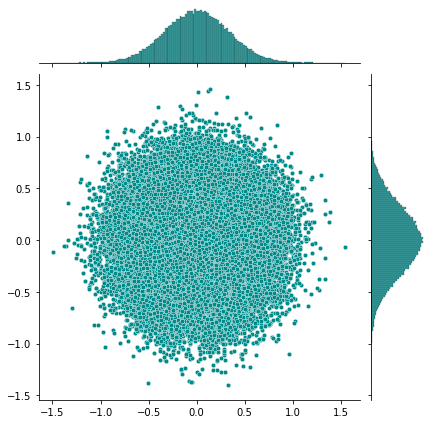

In [ ]:
n = 100000
mu, sigma = 0., 1/3 
xs = np.random.normal(mu, sigma, n)
ys = np.random.normal(mu, sigma, n)

sns.jointplot(x = xs, y= ys, kind = 'scatter', color = 'darkcyan', s = 20 )
plt.show()

## Laplace

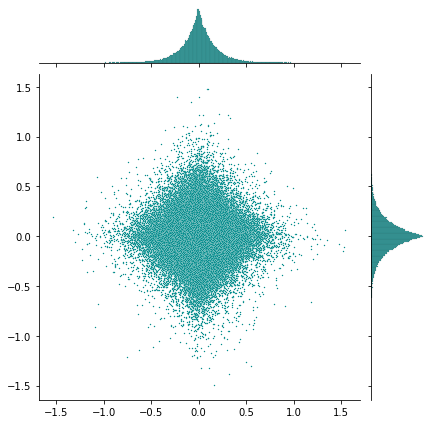

In [ ]:
mu, scale = 0., 1/7 
xs = np.random.laplace(mu, scale, n)
ys = np.random.laplace(mu, scale, n)

sns.jointplot(x = xs, y = ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()


## Uniforme

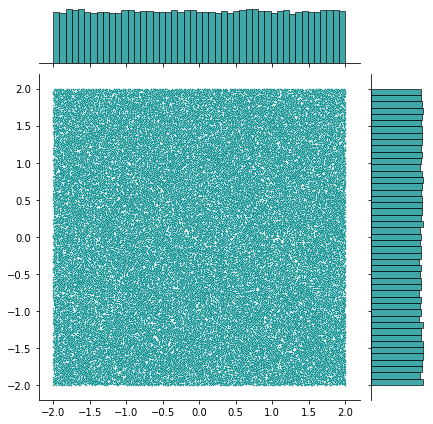

In [ ]:
a, b = -2., 2.
xs= np.random.uniform(a, b, n) 
ys= np.random.uniform(a, b, n) 

sns.jointplot(x = xs, y= ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()

## Ejercicio: Crear una función que dado un número de puntos, haga la simulación

In [ ]:
# ESPACIO para el ejercicio y lo grafique
class simulador:
  def __init__(self, lim_menor, lim_mayor, puntos):
    self.n = puntos
    self.lim_menor = lim_menor
    self.lim_mayor = lim_mayor
    self.xs = np.random.uniform(self.lim_menor, self.lim_mayor, self.n)
    self.ys = np.random.uniform(self.lim_menor, self.lim_mayor, self.n)
  
  def graficar(self):
    sns.jointplot(x = self.xs, y= self.ys, kind = 'scatter', color = 'darkcyan', s = 20 )
    plt.show()

In [ ]:
# Instanciar objeto
objetito = simulador(-2, 2, 5)

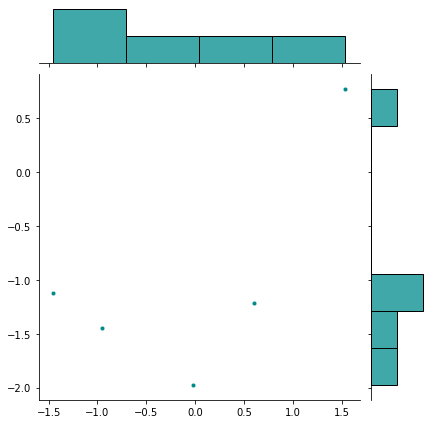

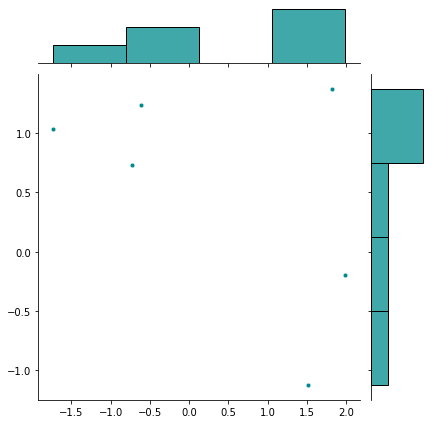

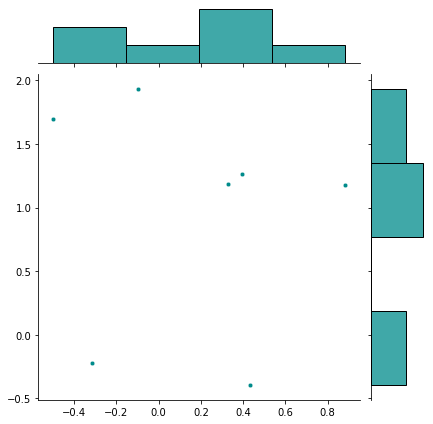

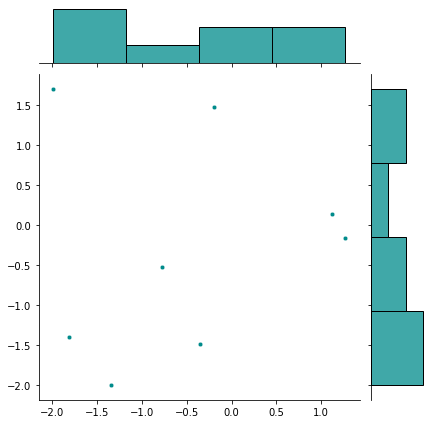

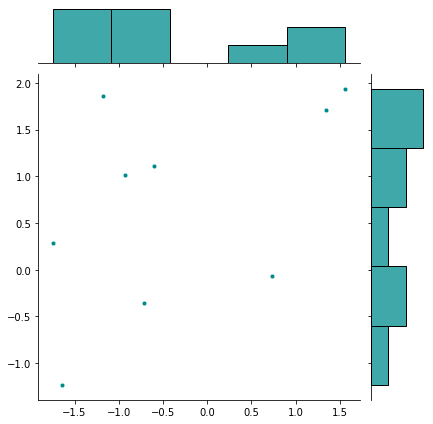

In [ ]:
for i in range(5,10):
  objetito = simulador(-2, 2, i)
  objetito.graficar()

# Solución

In [ ]:
#Generación de las coordenadas aleatorias
n=100000
a, b = -1., 1.
xs = np.random.uniform(low=a, high=b, size=n) 
ys = np.random.uniform(low=a, high=b, size=n) 

# Construimos un vector para cada punto que indique si éste cayó o no adentro
# del círculo.
en_circulo = np.where((np.sqrt(xs**2 + ys**2)<=1), 1, 0)

puntos_circulo = en_circulo.sum()
puntos_circulo

78494

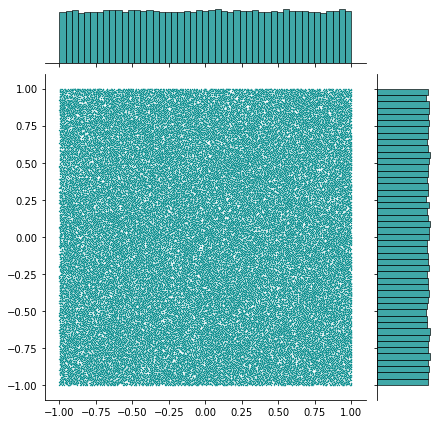

In [ ]:
sns.jointplot(x = xs, y= ys, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()

¿Cuántos puntos están en el cuadrado?
Si relacionamos los puntos que están dentro del círculo con el área del círculo y los que están dentro del cuadraro, con el area del cuadraro, podemos decir que :

$ \frac{puntos_{círculo}}{puntos_{cuadraro}}= \frac{\pi}{4}$

In [ ]:
4*puntos_circulo/n

3.13976

In [ ]:
def calcula_pi(n, print_results=True):
  '''Se lanzan puntos aleatorios con distribución uniforme en un cuadraro de
  de lado 2 (área = 4) que tiene inscrito un círculo de radio 2(área = pi)
  n: número de puntos que se lanzarán al tapete'''
  
  #Generación de las coordenadas aleatorias
  a, b = -1., 1.
  xs = np.random.uniform(low=a, high=b, size=n) 
  ys = np.random.uniform(low=a, high=b, size=n) 

  # Construimos un vector para cada punto que indique si éste cayó o no adentro
  # del círculo.
  en_circulo = np.where((np.sqrt(xs**2 + ys**2)<=1), 1, 0)

  puntos_circulo = en_circulo.sum()
  puntos_cuadrado = n

  pi = 4* puntos_circulo/ puntos_cuadrado
  error = abs(np.pi-pi)

  if print_results==True:
    plt.figure(figsize=(6,6))
    sns.scatterplot( x=xs, y=ys, s = 4, hue=en_circulo )
    plt.legend([],[], frameon=False)
    plt.show()

    print('pi =', pi)
    print('error =', error)

  return pi


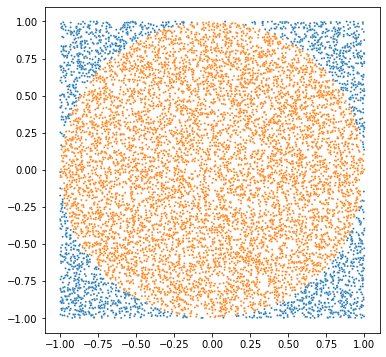

pi = 3.1564
error = 0.014807346410206979


3.1564

In [ ]:
calcula_pi(10000)

# Velocidad de convergencia

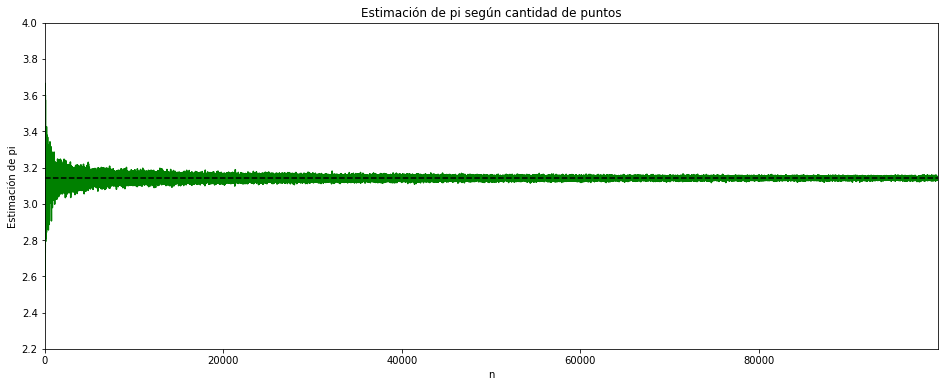

In [ ]:
ns = range(10, 100000)
pi_est = []
for n in ns:
  pi = calcula_pi(n, print_results=False)
  pi_est.append(pi)

#Gráfica estimación de  pi vs pi
plt.figure(figsize=(16, 6))
plt.plot(ns, pi_est, color='g')
plt.axhline(y=np.pi, color='black', ls='--')
plt.xlim(0, ns[-1])
plt.ylim(2.2, 4)
plt.xlabel('n')
plt.ylabel('Estimación de pi')
plt.title('Estimación de pi según cantidad de puntos')
plt.show()